In [1]:
from bs4 import BeautifulSoup
import urllib.request               
from time import sleep
from datetime import datetime
import pandas as pd
import requests
import re
from datetime import date
#importind required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def getweather():
    weather = []
    url = "https://weather.com/en-IN/weather/today/l/0fcc6b573ec19677819071ea104e175b6dfc8f942f59554bc99d10c5cd0dbfe8"
    day = date.today().day
    weather.append(day)
    month = date.today().month
    weather.append(month)
    year = date.today().year
    weather.append(year)
    
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    temp = soup.find("div",{"class":"today_nowcard-temp"}).text[:-1]

    time = soup.find("p",{"class":"today_nowcard-timestamp"}).text[6:]
    weather.append(time)
    weather.append(temp)
    condition = soup.find("div",class_="today_nowcard-phrase").text
    weather.append(condition)
    high = soup.find_all("span",class_="deg-hilo-nowcard")[0].text[:-1]

    low = soup.find_all("span",class_="deg-hilo-nowcard")[1].text[:-1]
    weather.append(high)
    weather.append(low)
    rightnow = soup.find("div",class_="today_nowcard-sidecar component panel").find("table")

    wind = rightnow.find_all("tr")[0].find("span").text
    weather.append(wind)
    Humidity = rightnow.find_all("tr")[1].find("span").text[:-1]
    weather.append(Humidity)
    dew = rightnow.find_all("tr")[2].find("span").text[:-1]
    weather.append(dew)
    pressure = rightnow.find_all("tr")[3].find("span").text[:-3]
    pressure = pressure.replace(',', '')
    weather.append(pressure)
    visibility = rightnow.find_all("tr")[4].find("span").text
    weather.append(visibility)
    if(int(temp)>=30):
        heat = "YES"
    else:
        heat = "NO"
    weather.append(heat)
    if(int(Humidity)>=80):
        wet = "YES"
    else:
        wet = "NO"
    weather.append(wet)
    print("Day : ",day)
    print("Month : ",month)
    print("Year : ",year)
    print("Time : ",time)
    print("Temperature : ",temp)
    print("Condition : ",condition)
    print("High/Low : {}/{}".format(high,low))
    print("Wind : ",wind)
    print("Humidity : ",Humidity)
    print("Dew Point : ",dew)
    print("Pressure : ",pressure)
    print("Visibility : ",visibility)
    print("Heat : ",heat)
    print("Wet : ",wet)
    return weather

In [4]:
import csv
import openpyxl
import sys

def main():
    print("Collecting  Weather Data in a intervals of 30 mins")
    idx = 0
    weatherdata = {'Day':[],'Month':[],'Year':[],'mean_temp':[],'max_temp':[],'min_temp':[],'meanhum':[],'meandew':[],'pressure':[],'heat':[],'wet':[]}
    filename = 'data.xlsx'
    wb = openpyxl.load_workbook(filename=filename)
    sheet = wb['Sheet1']
    #new_row = ['Day','Month','Year','mean_temp','max_temp','min_temp','meanhum','meandew','pressure','heat','wet']
    #sheet.append(new_row)
    while idx < 1:
        print('collecting weather data '+str(idx))
        tmp = getweather()
        weatherdata['Day'].append(tmp[0])
        weatherdata['Month'].append(tmp[1])
        weatherdata['Year'].append(tmp[2])
        weatherdata['mean_temp'].append(tmp[4])
        weatherdata['max_temp'].append(tmp[6])
        weatherdata['min_temp'].append(tmp[7])
        weatherdata['meanhum'].append(tmp[9])
        weatherdata['meandew'].append(tmp[10])
        weatherdata['pressure'].append(tmp[11])
        weatherdata['heat'].append(tmp[13])
        weatherdata['wet'].append(tmp[14])
        
        try :
            new_row = [int(tmp[0]),int(tmp[1]),int(tmp[2]),float(tmp[4]),float(tmp[6]),float(tmp[7]),float(tmp[9]),float(tmp[10]),float(tmp[11]),tmp[13],tmp[14]]
            sheet.append(new_row)
        except ValueError as e:
            print (e)
        idx+=1
    wb.save(filename)
    
    print(weatherdata)

In [9]:
dataset=pd.read_csv("C:/Users/Harsh/OneDrive/Documents/temperature.csv")
dataset.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [10]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
dataset.iloc[:,0]=lab.fit_transform(dataset.iloc[:,0])
dataset.iloc[:,1]=lab.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,2]=lab.fit_transform(dataset.iloc[:,2])
dataset.iloc[:,3]=lab.fit_transform(dataset.iloc[:,3])
dataset.iloc[:,4]=lab.fit_transform(dataset.iloc[:,4])
dataset.iloc[:,5]=lab.fit_transform(dataset.iloc[:,5])
dataset.iloc[:,6]=lab.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,7]=lab.fit_transform(dataset.iloc[:,7])
dataset.iloc[:,8]=lab.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,9]=lab.fit_transform(dataset.iloc[:,9])
dataset.iloc[:,10]=lab.fit_transform(dataset.iloc[:,10])

dataset.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,22,304,26,30,44,899,1042,268,2982,4990,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,23,304,26,36,14,681,1442,263,3828,2866,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,24,304,25,33,12,670,2146,232,4963,41,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,25,310,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,25,310,166,154,7671,7663,7674,7674,7674,7674,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


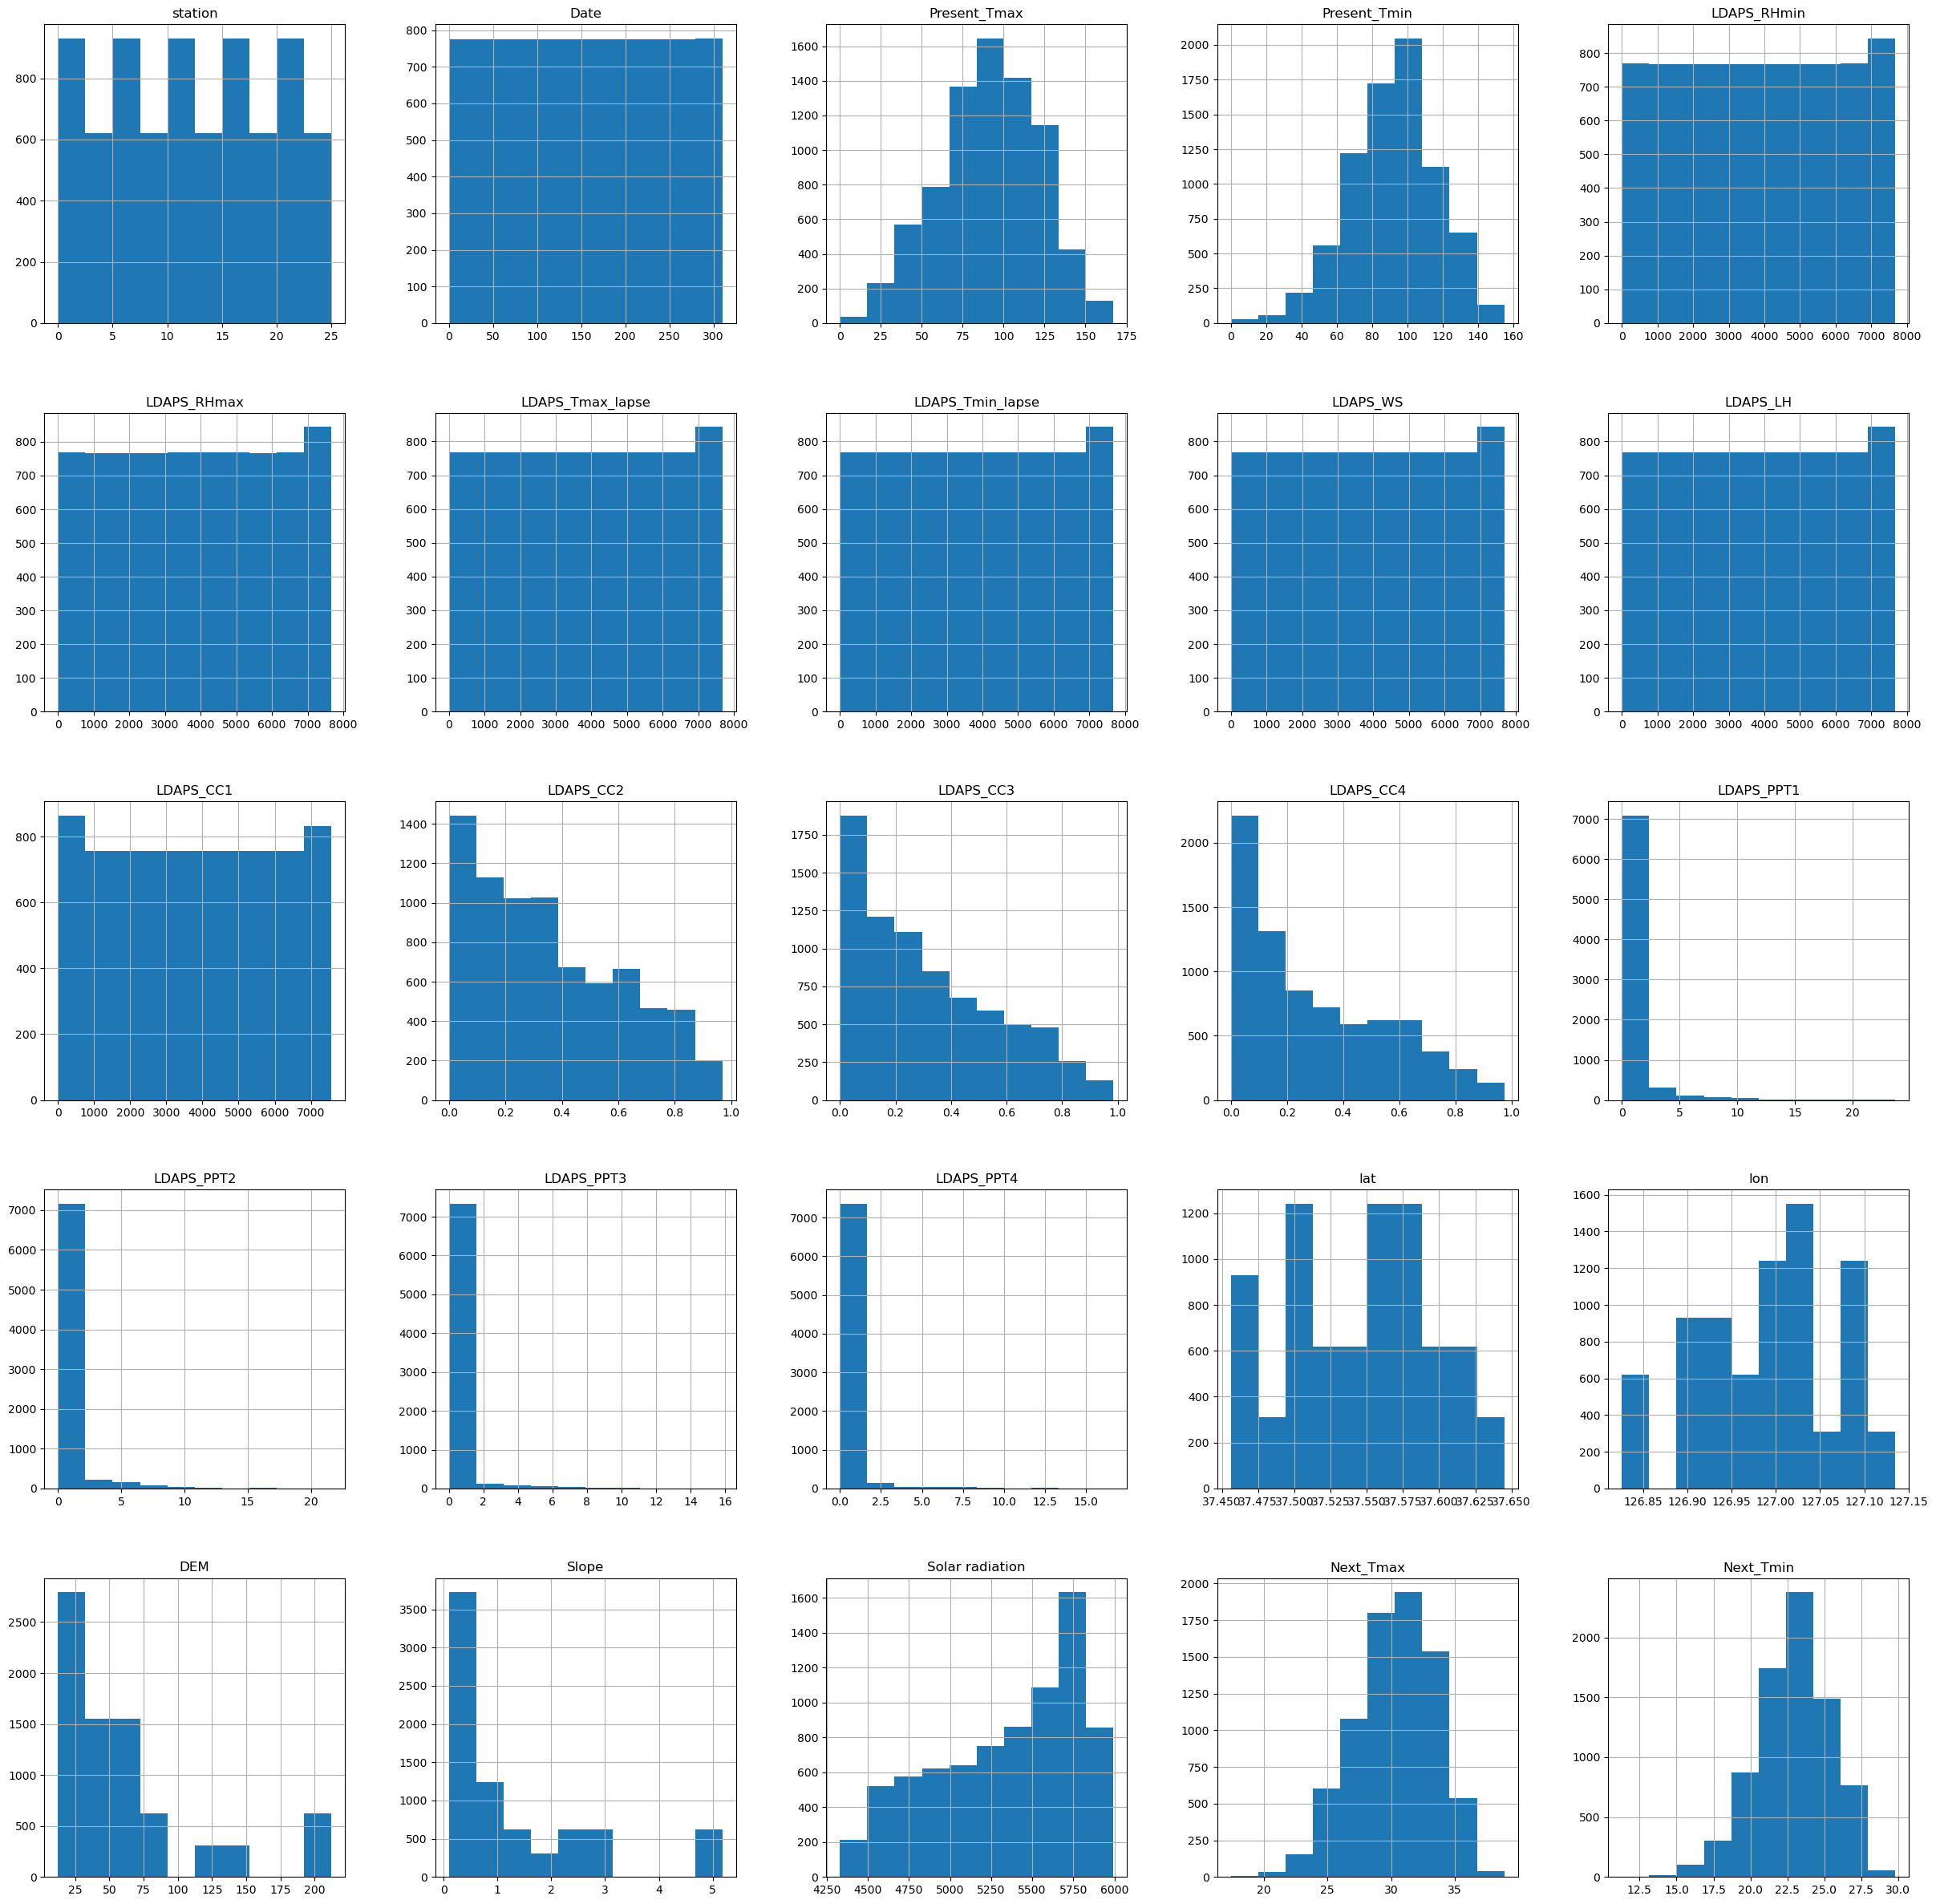

In [12]:
dataset.hist(figsize = (30, 30))
plt.savefig("dataset.png")
plt.show()